# Homework 2

Visualize, describe, and model distributions

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [48]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

Here are some of the functions from Chapter 5.

In [49]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [50]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, '+', alpha=0.3, label=label)

Read the GSS data again.

In [51]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 11.2 ms, sys: 31.4 ms, total: 42.7 ms
Wall time: 41.6 ms


(62466, 101)

In [52]:
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,0,0,2,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30,2,0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,0,0,7,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18,1,6,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22,2,3,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [53]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

### Distribution of age

Here's the CDF of ages.

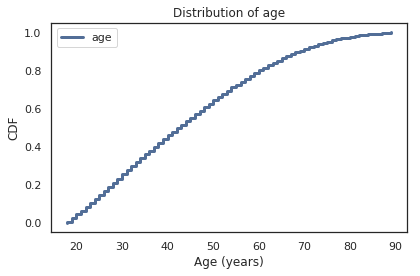

In [54]:
cdf_age = Cdf(gss.age)
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

**Exercise**:  Each of the following cells shows the distribution of ages under various transforms, compared to various models.  In each text cell, add a sentence or two that interprets the result.  What can we say about the distribution of ages based on each figure?

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

Interpretation:

Because the shape of the CDF of ages is not a sigmoid like the CDF of the normal distribution, this leads me to believe that the best model of ages may not be a normal distribution. It's possible that the middle of the distribution could be modeled with a normal distribution because it is reasonably linear, but I think we can do better, especially because the mean and the variance don't give us the same slope of the linear region of the curve.

n, mean, std 62281 44.47905368874617 16.48203748567592


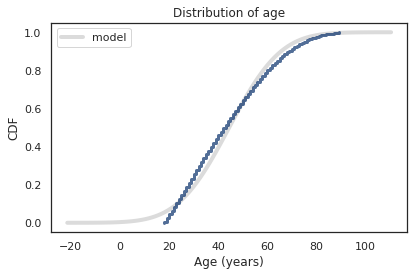

In [55]:
MakeNormalModel(gss.age.dropna(), label='')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

2) Here's a normal probability plot for the distribution of ages.

Interpretation:

This again shows that the data does not fit the normal distribution on the ends very well, but it does look a little better in the linear region two standard deviations away from the mean. Looking at it in this graph reveals that the normal distribution fit better than I expected, since two standard deviations capture about 95% of the data.

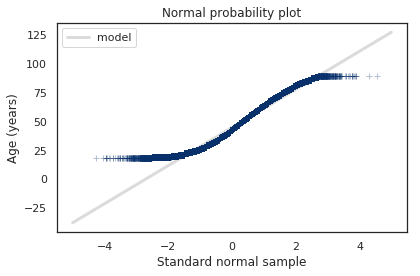

In [56]:
MakeNormalPlot(gss.age.dropna(), label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Age (years)')

3) Here's the complementary CDF on a log-y scale.

Interpretation:

Looking at this CCdf, I would not use an exponential model to describe this data. If it were exponential, I would expect to see a negatively sloped straight line. For the tails of the data, I guess we could linearly interpolate the regions, but I would be more inclined to use a normal distribution for most of the ages.

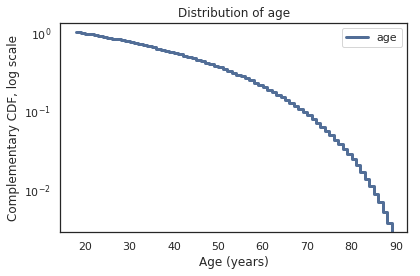

In [57]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF of ages on a log-x scale.

Interpretation:

This looks somewhat linear, so y = c * log(x) may be an alright model for the data, but there is what I think is a fairly significant curve upward from the beginning to 40 years, so I'd probably look for a better model than this one. This might actually be a somewhat subtle sigmoid. 

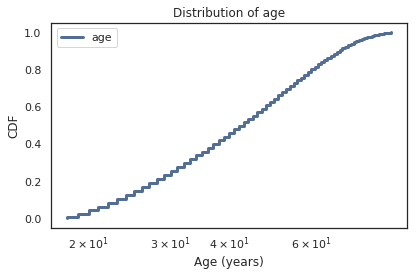

In [58]:
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of ages, compared to a normal model.

Interpretation:

This makes me think that the lognormal model may be a little better because the log of the ages follows the sigmoid shape of the normal model. I might actually be more willing to use a lognormal model after looking at this.

n, mean, std 62281 1.6168744157503179 0.16787914328916737


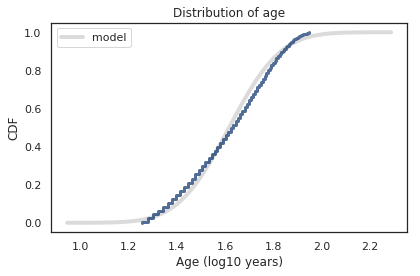

In [59]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of age', 
         xlabel='Age (log10 years)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of ages.

Interpretation:

I think that the normal model better fit this straight line than the lognormal model shown below. The curve is never quite straight, and it deviates from the normal model after about 1.5 standard deviations as opposed to the 2 standard deviations when making a NNP of the linear data.

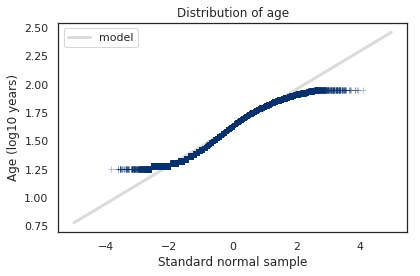

In [60]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

7) Here's the complementary CDF on a log-log scale.

Interpretation:

This model does not really fit what we would expect from a Pareto distribution. There is no portion of the curve that I would call linear. This *might* be ok for modelling the tails of the data, but the normal distribution is still winning for the best model for the majority of the data.

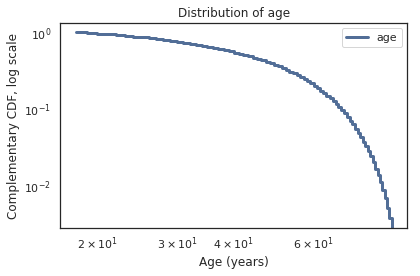

In [61]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether ages are well-modeled by a Weibull distribution.

Interpretation:

There's no linear region of this curve either, so I would not use the Weibull distribution to model this data at all.

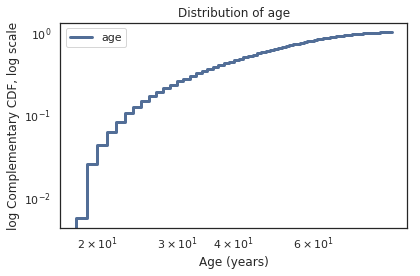

In [62]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

### Distribution of income

Here's the CDF of `realinc`.

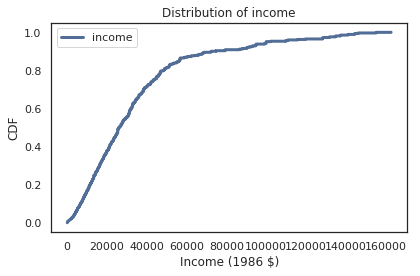

In [63]:
cdf_realinc = Cdf(gss.realinc)
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

**Exercise:** Use visualizations like the ones in the previous exercise to see whether there is an analytic model that describes the distribution of `gss.realinc` well.

Interpretation:

This does not have a sigmoid shape like I would expect a normal distribution's CDF to have, so I am ruling out the normal disribution as a model for income based on the CDF.

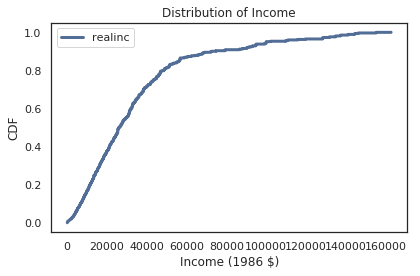

In [64]:
cdf_realinc = Cdf(gss.realinc)
thinkplot.cdf(cdf_realinc, label='realinc')

decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

2) Here's a normal probability plot for the values.

Interpretation:

This confirms that a normal distribution is not the right model for income. There is nowhere in the normal probability plot that follows the linear model. I wouldn't expect income to be normally distributed, so this makes sense.



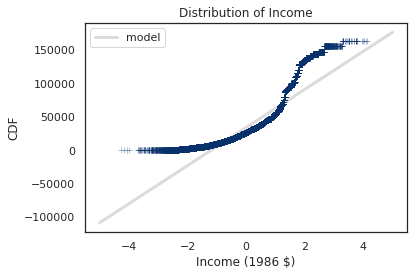

In [65]:
MakeNormalPlot(gss.realinc.dropna(), label='')

decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

3) Here's the complementary CDF on a log-y scale.

Interpretation:

This looks possibly linear enough to use the exponential model on incomes up to 120,00 or so, but the higher incomes should be modeled using a different distribution where the ccdf sharply curves downward.

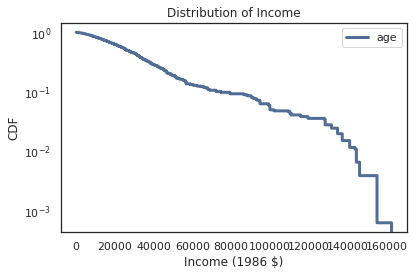

In [66]:
thinkplot.cdf(cdf_realinc, label='age', complement=True)
decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF',
         yscale='log')

4) Here's the CDF on a log-x scale.

Interpretation:

This looks a lot like a sigmoid, which makes me think that the lognormal model could be a good fit for this data. I have a feeling the next plot will back this conclusion up.

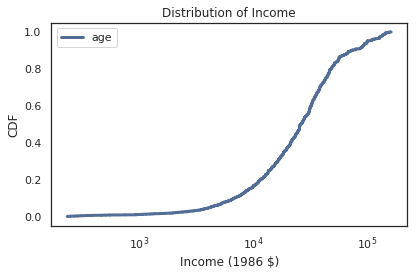

In [67]:
thinkplot.cdf(cdf_realinc, label='age')
decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of the values, compared to a normal model.

Interpretation:

Until the very highest incomes, the log of the incomes very closely follows a normal cdf. This confirms that the lognormal model would make a good model for most of this distribution. I'm interested to see if there's a better fit for the highest incomes.

n, mean, std 55499 4.381031736514132 0.38566002732086424


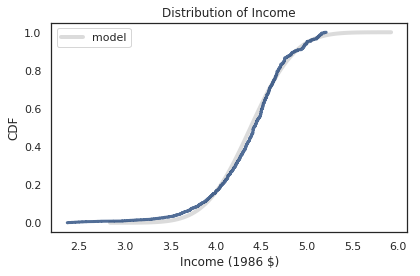

In [68]:
values = np.log10(gss.realinc.dropna())
MakeNormalModel(values, label='')
decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of the values.

Between -2 and 2 standard deviations from the mean, the NPP looks linear enough. So, I might use the lognormal model for this range of incomes, and I would choose a different model for the tails of the distribution. This plot is helpful because it tells me that I should also consider not using a lognormal model for the lowest incomes, which the other representations did not make as clear.

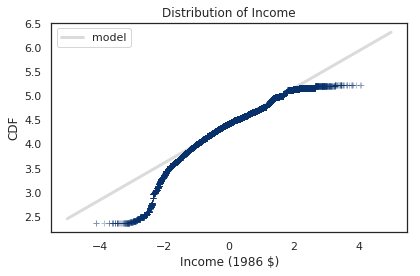

In [69]:
MakeNormalPlot(values, label='')
decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

7) Here's the complementary CDF on a log-log scale.

Interpretation:

The very steep portion of the curve at the highest incomes looks fairly linear to me, so I would consider modeling the highest incomes as a Pareto distribution.



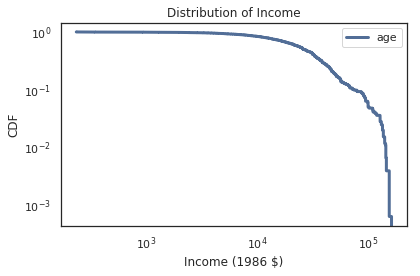

In [70]:
thinkplot.cdf(cdf_realinc, label='age', complement=True)
decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF',
         xscale='log',
         yscale='log')

8) Here's a test to see whether the values are well-modeled by a Weibull distribution.

Interpretation:

The region in the middle of the CDF looks linear, so a Weibull distribution could also be a good model for a middle range of incomes. It does not look like a good representation of high incomes, so I would probably stick to the Pareto distribution to model those.

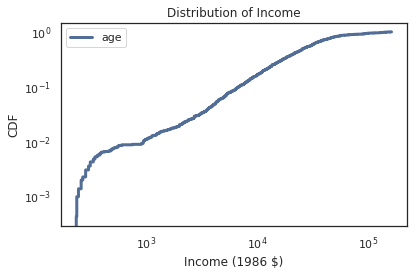

In [71]:
thinkplot.cdf(cdf_realinc, label='age', transform='Weibull')
decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF',
         xscale='log',
         yscale='log')

## BRFSS


In [72]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

CPU times: user 3.69 ms, sys: 7.76 ms, total: 11.4 ms
Wall time: 10.9 ms


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0


Let's look at the distribution of height in the BRFSS dataset.  Here's the CDF.

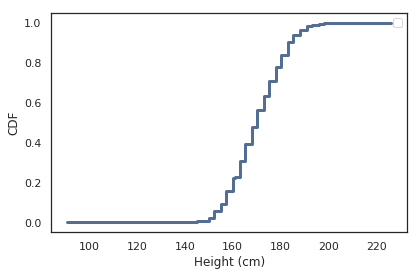

In [73]:
heights = brfss.HTM4

cdf_heights = Cdf(heights)
thinkplot.Cdf(cdf_heights)

decorate(xlabel='Height (cm)', ylabel='CDF')

To see whether a normal model describes this data well, we can use KDE to estimate the PDF.

In [74]:
from scipy.stats import gaussian_kde

Here's an example using the default bandwidth method.

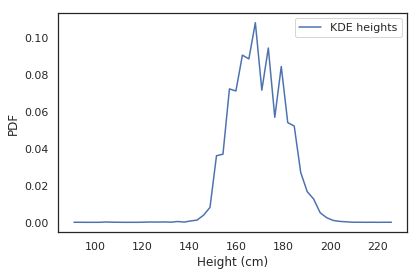

In [75]:
kde = gaussian_kde(heights.dropna())

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

It doesn't work very well; we can improve it by overriding the bandwidth with a constant.

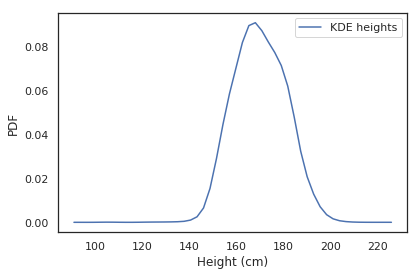

In [76]:
kde = gaussian_kde(heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

Now we can generate a normal model with the same mean and standard deviation.

In [77]:
mean = heights.mean()
std = heights.std()

mean, std

(170.09044280714292, 10.795080237191893)

Here's the model compared to the estimated PDF.

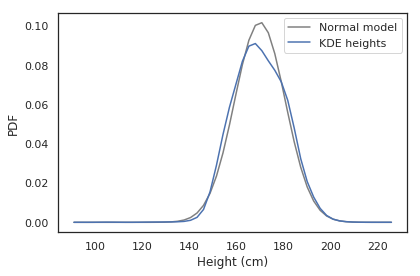

In [78]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data don't fit the model particularly well, possibly because the distribution of heights is a mixture of two distributions, for men and women.

**Exercise:** Generate a similar figure for just women's heights and see if the normal model does any better.

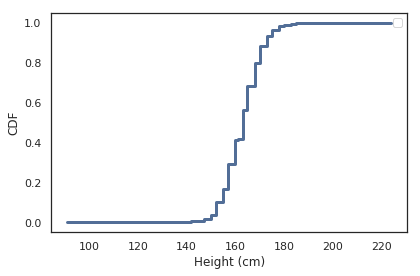

In [79]:
females = brfss[brfss['SEX'] == 2]
heights_female = females['HTM4']

cdf_heights_female = Cdf(heights_female)
thinkplot.Cdf(cdf_heights_female)

decorate(xlabel='Height (cm)', ylabel='CDF')

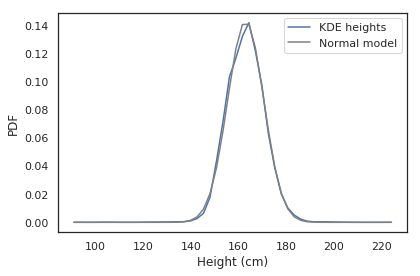

In [80]:
kde_female = gaussian_kde(heights_female.dropna(), bw_method=0.3)

xs = np.linspace(heights_female.min(), heights_female.max())
ds = kde_female.evaluate(xs)
ds /= ds.sum()

mean = heights_female.mean()
std = heights_female.std()

normal_pdf_female = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf_female.Density(xs)
ps /= ps.sum()

plt.plot(xs, ds, label='KDE heights')
plt.plot(xs, ps, color='gray', label='Normal model')

decorate(xlabel='Height (cm)', ylabel='PDF')

The kde fits this pdf much better. This leads me to believe that the heights of men and women should be modelled separately as normal distributions.

**Exercise:** Generate a similar figure for men's weights, `brfss.WTKG3`.  How well does the normal model fit?

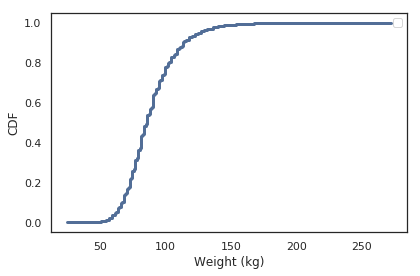

In [81]:
males = brfss[brfss['SEX']==1]
weights_male = males['WTKG3']

cdf_weights_male = Cdf(weights_male)
thinkplot.Cdf(cdf_weights_male)

decorate(xlabel='Weight (kg)', ylabel='CDF')

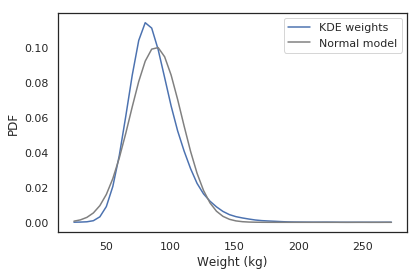

In [82]:
kde_male = gaussian_kde(weights_male.dropna(), bw_method=0.3)

xs = np.linspace(weights_male.min(), weights_male.max())
ds = kde_male.evaluate(xs)
ds /= ds.sum()

mean = weights_male.mean()
std = weights_male.std()

normal_pdf_male = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf_male.Density(xs)
ps /= ps.sum()

plt.plot(xs, ds, label='KDE weights')
plt.plot(xs, ps, color='gray', label='Normal model')

decorate(xlabel='Weight (kg)', ylabel='PDF')

The normal model does not fit the kde well, since the kde appears skewed slightly right.

**Exercise:** Try it one more time with the log of men's weights.  How well does the normal model fit?  What does that imply about the distribution of weight?

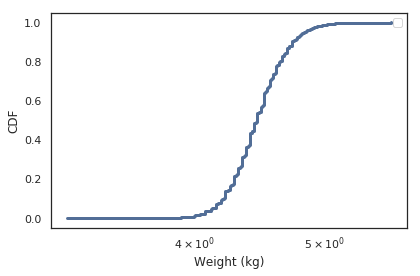

In [83]:
log_weights_male = np.log(weights_male.dropna())

cdf_log_weights_male = Cdf(log_weights_male)
thinkplot.Cdf(cdf_log_weights_male)

decorate(xlabel='Weight (kg)', ylabel='CDF', xscale='log')

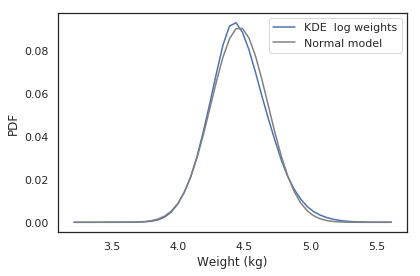

In [84]:
kde_log_male = gaussian_kde(log_weights_male.dropna(), bw_method=0.3)

xs = np.linspace(log_weights_male.min(), log_weights_male.max())
ds = kde_log_male.evaluate(xs)
ds /= ds.sum()

mean = log_weights_male.mean()
std = log_weights_male.std()

normal_pdf_log_male = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf_log_male.Density(xs)
ps /= ps.sum()

plt.plot(xs, ds, label='KDE  log weights')
plt.plot(xs, ps, color='gray', label='Normal model')

decorate(xlabel='Weight (kg)', ylabel='PDF')

This looks like the lognormal model works a little better, but it's still not as well fit as the female heights. The distribution is still skewed slightly right. 

## Skewness

Let's look at the skewness of the distribution of weights for men and women.

In [85]:
male = (brfss.SEX == 1)
male_weights = brfss.loc[male, 'WTKG3']

In [86]:
female = (brfss.SEX == 2)
female_weights = brfss.loc[female, 'WTKG3']

As we've seen, these distributions are skewed to the right, so we expect the mean to be higher than the median. 

In [87]:
male_weights.mean(), male_weights.median()

(88.83871202340993, 86.18)

We can compute the moment-based sample skewness using Pandas or `thinkstats2`.  The results are almost the same.

In [88]:
male_weights.skew(), thinkstats2.Skewness(male_weights.dropna())

(1.2607915291363547, 1.2607508370740947)

But moment-based sample skewness is a terrible statistic!  A more robust alternative is Pearson's median skewness:

In [89]:
thinkstats2.PearsonMedianSkewness(male_weights.dropna())

0.3961356157532533

**Exercise:** Compute the same statistics for women.  Which distribution is more skewed?

In [90]:
female_weights.mean(), female_weights.median()

(73.62438714355793, 70.31)

The mean is greater than the median, indicating that female weights are also skewed right.

In [91]:
female_weights.skew(), thinkstats2.Skewness(female_weights.dropna())

(1.3693028811523575, 1.3692590742841042)

This is a larger skew value than the males, but that doesn't tell us much because this is not a robust skewness measurement.

In [92]:
thinkstats2.PearsonMedianSkewness(female_weights.dropna())

0.5268415056705406

Based on this statistic, female weights are more skewed right than male weights.

**Exercise:** Explore the GSS or BRFSS dataset and find something interesting!

I decided to look at the distribution of income from the GSS dataset for men and women.

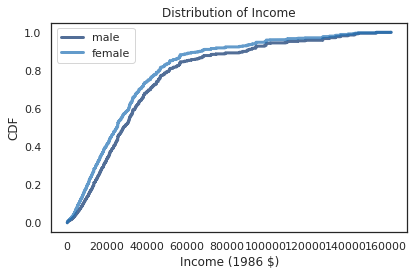

In [102]:
realinc_all = gss['realinc']
cdf_realinc = Cdf(realinc_all)

males = gss[gss['sex']==1]
realinc_male = males['realinc']
cdf_male = Cdf(realinc_male)

females = gss[gss['sex']==2]
realinc_female = females['realinc']
cdf_female = Cdf(realinc_female)

thinkplot.cdf(cdf_male, label='male')
thinkplot.cdf(cdf_female, label='female')
decorate(title='Distribution of Income',
        xlabel='Income (1986 $)',
        ylabel='CDF')

It looks like females are likely to be paid less at all income brackets.

Before, I determined that the lognormal distribution was an ok model of incomes for all respondants within 2 standard deviations of the mean. Let's see if that's true if we split the data by sex.

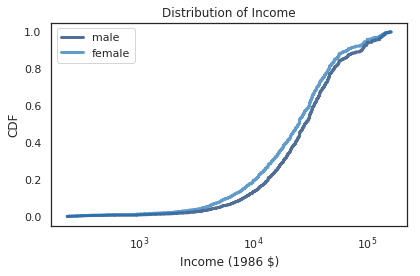

In [99]:
thinkplot.cdf(cdf_male, label='male')
thinkplot.cdf(cdf_female, label='female')
decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF',
         xscale='log')

n, mean, std 25992 4.42430399484415 0.36875385820824064


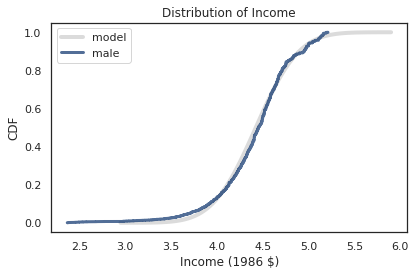

In [103]:
male_values = np.log10(realinc_male.dropna())
MakeNormalModel(male_values, label='male')
decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

n, mean, std 29507 4.342770916979817 0.3966379528796013


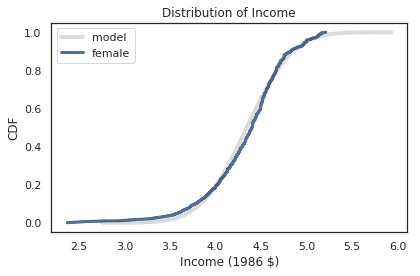

In [104]:
female_values = np.log10(realinc_female.dropna())
MakeNormalModel(female_values, label='female')
decorate(title='Distribution of Income'curves, 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

Both of these distributions are looking pretty convincingly lognormal. Let's see what the NPPs look like.

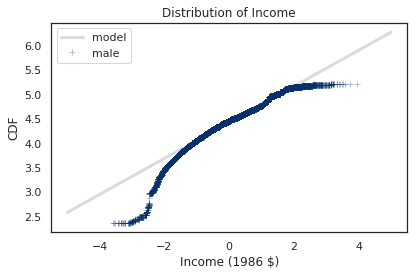

In [105]:
MakeNormalPlot(male_values, label='male')
decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

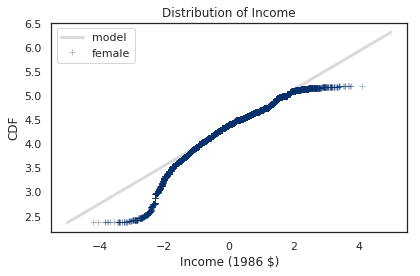

In [106]:
MakeNormalPlot(female_values, label='female')
decorate(title='Distribution of Income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

These both are fairly linear within a couple of stds from the mean, which is consistent with the income for both sexes.

Ok, so that wasn't very informative, but I wonder if the pdf will show any interesting information. since I already established that the log normal model is fine for this distribution, we can look at the log of the data against a normal model.

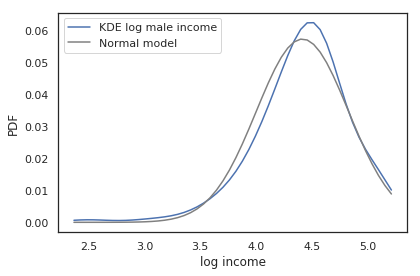

In [111]:
kde = gaussian_kde(male_values.dropna(), bw_method=0.4)

xs = np.linspace(male_values.min(), male_values.max())

ds = kde.evaluate(xs)
ds /= ds.sum()

mean = male_values.mean()
std = male_values.std()

normal_pdf = thinkstats2.NormalPdf(mean, std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ds, label='KDE log male income')
plt.plot(xs, ps, color='gray', label='Normal model')
decorate(xlabel='log income', ylabel='PDF')

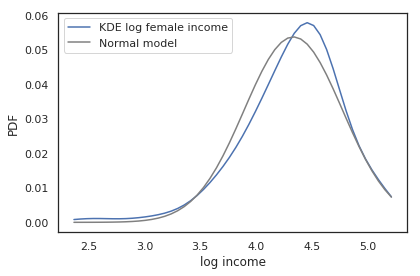

In [112]:
kde = gaussian_kde(female_values.dropna(), bw_method=0.4)

xs = np.linspace(female_values.min(), female_values.max())

ds = kde.evaluate(xs)
ds /= ds.sum()

mean = female_values.mean()
std = female_values.std()

normal_pdf = thinkstats2.NormalPdf(mean, std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ds, label='KDE log female income')
plt.plot(xs, ps, color='gray', label='Normal model')
decorate(xlabel='log income', ylabel='PDF')

So, the data doen't actually fit the model very well, but I wonder if that is because the higheest incomes are throwing off the model. These curves look a little skewed. Let's see if we can quantify that. First, let's look at the pdf of the linear data.

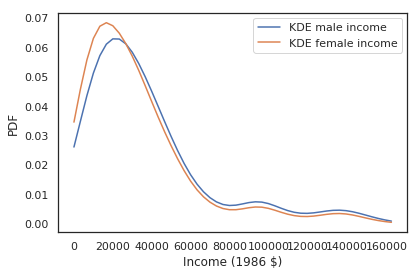

In [115]:
kde_male = gaussian_kde(realinc_male.dropna(), bw_method=0.3)
kde_female = gaussian_kde(realinc_female.dropna(), bw_method=0.3)

xs_male = np.linspace(realinc_male.min(), realinc_male.max())
xs_female = np.linspace(realinc_female.min(), realinc_female.max())
ds_male = kde_male.evaluate(xs_male)

ds_male /= ds_male.sum()
ds_female = kde_female.evaluate(xs_female)
ds_female /= ds_female.sum()

plt.plot(xs_male, ds_male, label='KDE male income')
plt.plot(xs_female, ds_female, label='KDE female income')
decorate(xlabel="Income (1986 $)", ylabel="PDF")

There is a long tail for both distributions, and the males are more likely to make a little more than the females. 

Just to really drive the point home that the female respondants to this question made less than the male respondants, let's measure the mean, median, and skewedness of both using the Pearson Median Skewness.

In [118]:
male_median = realinc_male.median()
male_mean = realinc_male.mean()

female_median = realinc_female.median()
female_mean = realinc_female.mean()

male_skew = thinkstats2.PearsonMedianSkewness(realinc_male.dropna())
female_skew = thinkstats2.PearsonMedianSkewness(realinc_female.dropna())

In [121]:
male_mean, male_median, male_skew

(37374.93486774378, 28490.0, 0.8330673170249195)

In [122]:
female_mean, female_median, female_skew

(32348.285646991157, 24937.0, 0.7603429497284502)

It looks like the female distribution is less skewed right than the male distribution, but the median and mode are both quite a bit smaller.

I think future work on this analysis would include dividing the income data by year and/or occupation to see the differeces. This got me interested in looking further into the gss dataset.